In [1]:
import dataclasses

import ipywidgets as widgets
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

%matplotlib ipympl

In [2]:
def make_slider(
    vmin: float,
    vmax: float,
    logscale: bool = True,
    n_steps: int = 400,
) -> widgets.FloatSlider | widgets.FloatLogSlider:
    if logscale:
        logmin = np.log10(vmin)
        logmax = np.log10(vmax)
        logstep = (logmax - logmin) / n_steps
        return widgets.FloatLogSlider(
            min=logmin,
            max=logmax,
            step=logstep,
            value=10 ** ((logmax + logmin) / 2.0),
            base=10,
            readout_format=".3e",
        )
    else:
        return widgets.FloatSlider(
            min=vmin,
            max=vmax,
            step=(vmax - vmin) / n_steps,
            value=(vmax + vmin) / 2,
        )

In [3]:
def sigmoid_reward_widget(
    f,
    energy_max: float = 40.0,
    n_discr: int = 1000,
) -> widgets.VBox:
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.set_title("Sigmoid reward_fn")

    @dataclasses.dataclass
    class State:
        line: Line2D | None = None

    state = State()

    def update_figure(alpha: float = 0.0):
        if  state.line is None:
            ax.grid(True, which="major")
            ax.set_xlabel("Energy", fontsize=12)
            ax.set_ylabel("Reward Coef", fontsize=12)
            # ax.set_ylim((-1.0, 1.0))
        else:
            state.line.remove()

        energy = np.linspace(0.0, energy_max, n_discr)
        state.line = ax.plot(energy, f(energy, alpha), color="xkcd:bluish purple")[0]
        fig.canvas.draw()
        fig.canvas.flush_events()

    interactive = widgets.interactive(update_figure, alpha=make_slider(-1.0, 1.0, logscale=False, n_steps=n_discr))
    return widgets.VBox([interactive])

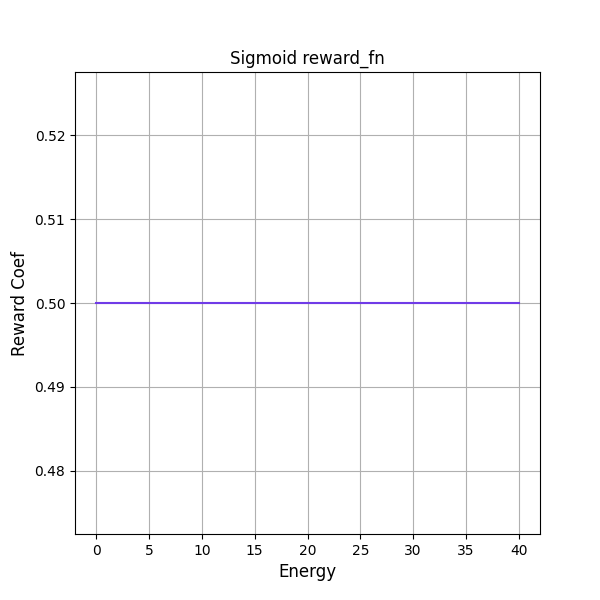

In [4]:
sigmoid_reward_widget(lambda e, a: 1.0 / (1.0 + np.exp(- e * a)))

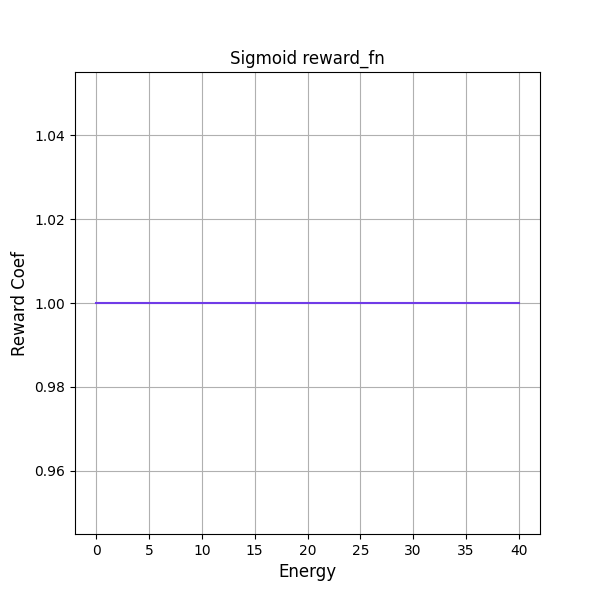

In [11]:
sigmoid_reward_widget(lambda e, a: 2.0 / (1.0 + np.exp(- e * a)) - (a > 0))

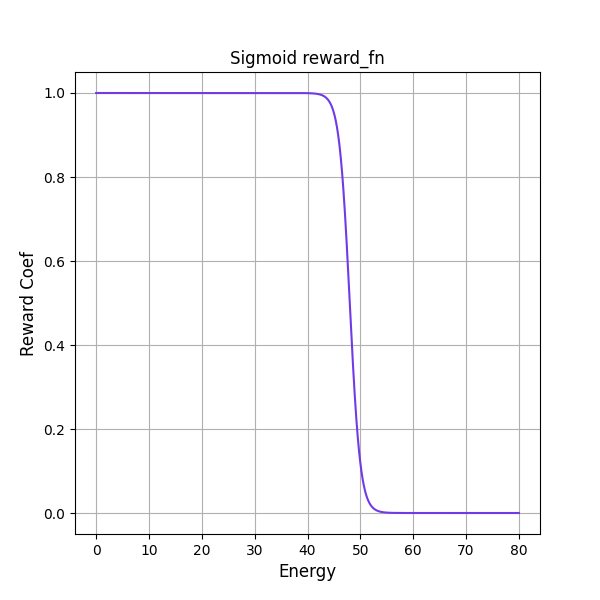

In [38]:
def delayed_sig(e, a):
    if a > 0:
        return 1.0 / (1.0 + np.exp(-e + 32 * a))
    else:
        return 1.0 / (1.0 + np.exp(e - 32 * (1.0 + a) - 16))

sigmoid_reward_widget(delayed_sig, energy_max=80)

In [7]:
def sinh_reward_widget(
    f,
    alpha_max: float = 5.0,
    n_discr: int = 1000
) -> widgets.VBox:
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.set_title("Sinh reward_fn")

    @dataclasses.dataclass
    class State:
        line: Line2D | None = None

    state = State()

    def update_figure(alpha: float = 0.0):
        if state.line is None:
            ax.grid(True, which="major")
            ax.set_xlabel("W", fontsize=12)
            ax.set_ylabel("Reward Coef", fontsize=12)
            # ax.set_ylim((-1.0, 1.0))
        else:
            state.line.remove()

        w = np.linspace(-1.0, 1.0, n_discr)
        state.line = ax.plot(w, f(w, alpha), color="xkcd:bluish purple")[0]
        fig.canvas.draw()
        fig.canvas.flush_events()

    interactive = widgets.interactive(
        update_figure, alpha=make_slider(0.0, alpha_max, logscale=False, n_steps=n_discr)
    )
    return widgets.VBox([interactive])

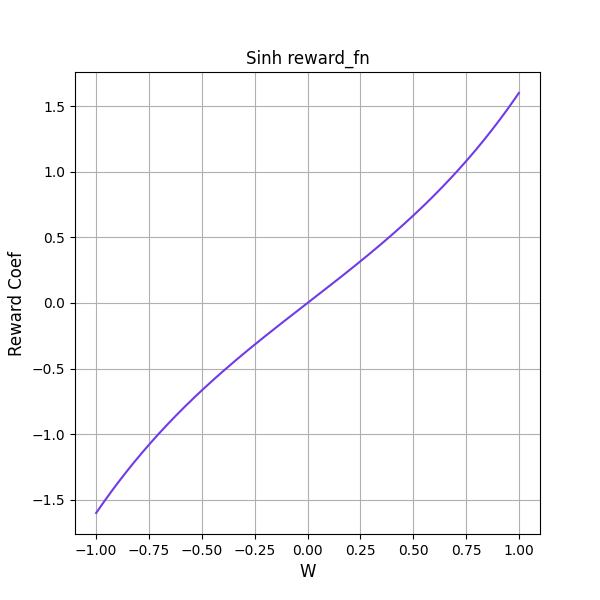

In [8]:
sinh_reward_widget(lambda w, alpha: np.sinh(w * alpha), 2.5)